In [ ]:
#############反向传播视频讲的很浅，不是很能理解，需要再找一本书来看看

In [ ]:
#############了解的不够深入，不是很清晰具体工程花了很多时间

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from scipy.io import loadmat

In [4]:
import matplotlib.pyplot as plt

In [5]:
path=r"C:\Users\王飘鸿\Desktop\机器学习\吴恩达作业\machine-learning-ex4\ex4"

In [6]:
path1=path+"\ex4data1.mat"

In [8]:
X=loadmat(path1)["X"]

In [10]:
y=loadmat(path1)["y"]

In [31]:
path2=path+"\ex4weights.mat"

In [39]:
theta1=loadmat(path2)["Theta1"]

In [40]:
theta2=loadmat(path2)["Theta2"]

In [44]:
X.shape

(5000, 400)

In [226]:
y.shape

(5000, 1)

In [42]:
theta2.shape

(10, 26)

In [43]:
theta1.shape

(25, 401)

In [17]:
###########还是之前实验用的数据集
###########使用之前的数据可视化函数

In [22]:
def init_data_plot(data):
    fig,ax_array=plt.subplots(nrows=10,ncols=10,figsize=(3,3),sharex=True,sharey=True)
    for i in range(10):
        for j in range(10):
            object_signature=np.random.randint(len(data))
            ax_array[i,j].matshow(np.array(data[object_signature].reshape((20,20))).T)

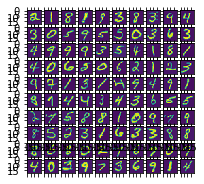

In [23]:
init_data_plot(X)

In [251]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [52]:
############前向传播函数
############之前不是做过一次了吗？

In [252]:
def forward_propagate(X,theta1,theta2):
    X=np.insert(X,0,values=np.ones(len(X)),axis=1)
    X=np.matrix(X)
    theta1=np.matrix(theta1)
    theta2=np.matrix(theta2)
    z2=X.dot(theta1.T)
    a2=np.matrix(np.insert(sigmoid(np.array(z2)),0,values=np.ones(len(X)),axis=1))
    z3=theta2.dot(a2.T)
    result=sigmoid(z3)
    return result

In [204]:
##############中间的计算过程被删减了
####################很明显得到的正向传播结果计算没出错
print(classification_report(y, orign_result.reshape((5000,1))))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



In [205]:
result=forward_propagate(X,theta1,theta2)

In [206]:
result[:,0]

matrix([[1.12661530e-04],
        [1.74127856e-03],
        [2.52696959e-03],
        [1.84032321e-05],
        [9.36263860e-03],
        [3.99270267e-03],
        [5.51517524e-03],
        [4.01468105e-04],
        [6.48072305e-03],
        [9.95734012e-01]])

In [137]:
#######要先把y处理一下
#######引入新的模块

In [207]:
from sklearn.preprocessing import OneHotEncoder

In [227]:
encoder=OneHotEncoder(sparse=False)
processed_y=encoder.fit_transform(y)

In [228]:
processed_y.shape    #######构造出符合条件的打标数据

(5000, 10)

In [229]:
result.shape

(10, 5000)

In [294]:
#####构造代价函数
#####十分注意log内不能等于0
#####为什么啊代价函数结果这么离奇
#####找不到哪里错了，卡住了
#####发现问题了！！！！矩阵乘法中存在错误不必要的相乘运算
#####很快解决了,终于对了
#####函数内的注释是原来错的部分

In [295]:
def calculate_cost(label,predicted):
    cost=0
    label=np.matrix(label)
    predicted=np.matrix(predicted)
    predicted[np.where(predicted==1)]=0.9999999999999
    predicted[np.where(predicted==0)]=0.0000000000001
    ##first=np.sum(-1*(label).dot(np.log(predicted)))
    ##second=np.sum((1-label).dot(np.log(1-predicted)))
    first=(-1*(label).dot(np.log(predicted)))
    second=(1-label).dot(np.log(1-predicted))   
    for i in range(len(label)):
        cost=cost+(first[i,i]-second[i,i])/len(label)
    return cost

In [289]:
calculate_cost(label=processed_y,predicted=result)

0.2876291651613187

In [315]:
######引入正则化后的版本
#######基本符合结果

In [316]:
def caculate_reg_cost(label,predicted,theta1,theta2,Lambda):
    cost=calculate_cost(label,predicted)
    theta1=np.matrix(theta1)
    theta2=np.matrix(theta2)
    reg=Lambda*(np.sum(np.multiply(theta1,theta1))+np.sum(np.multiply(theta2,theta2)))/(2*len(label))
    cost=cost+reg
    return cost

In [383]:
caculate_reg_cost(label=processed_y,predicted=result,theta1=theta1,theta2=theta2,Lambda=1)

0.28848459827885814

In [320]:
############正式处理反向传播部分
############先求出梯度导数

In [331]:
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z),(1-sigmoid(z)))

In [334]:
######分别对theata1,theta2进行随机初始化

In [347]:
######要先确定每一层的激活单元数目
######手动初始化

In [380]:
hidden_size=theta1.shape[0]
result_size=theta2.shape[0]
theta1=(np.random.random(size=(hidden_size,X.shape[1]+1))-0.5)*0.1
theta2=(np.random.random(size=(result_size,theta.shape[0]+1))-0.5)*0.1

In [356]:
theta1.shape

(25, 401)

In [357]:
theta2.shape

(10, 26)

In [413]:
######最难的一部分，反向神经网络的具体实现
######首先前向传播一次
######然后得到误差

In [422]:
def forward_propagate(X,theta1,theta2):
    X=np.insert(X,0,values=np.ones(len(X)),axis=1)
    X=np.matrix(X)
    theta1=np.matrix(theta1)
    theta2=np.matrix(theta2)
    z2=X.dot(theta1.T)
    a2=np.matrix(np.insert(sigmoid(np.array(z2)),0,values=np.ones(len(X)),axis=1))
    z3=theta2.dot(a2.T)
    result=sigmoid(z3)
    return result,z2,X,a2

In [441]:
############返回cost函数

In [446]:
def caculate_d(X,init_theta1,init_theta2):
    result,z2,a1,a2=forward_propagate(X,init_theta1,init_theta2)
    #print(z2.shape)
    z2=np.matrix(np.insert(np.array(z2),0,values=np.ones(len(z2)),axis=1))
    delta2=np.zeros(init_theta1.shape)
    delta1=np.zeros(init_theta2.shape)
    d3=processed_y.T-result
    d2=np.multiply((theta2.T).dot(d3),sigmoid_gradient(z2.T))
    return d3,d2,a1,a2,delta1,delta2

In [450]:
def back_pro(X,init_theta1,init_theta2):
    d3,d2,a1,a2,delta1,delta2=caculate_d(X=X,init_theta1=theta1,init_theta2=theta2)
    print(d3.shape)
    delta2=delta2+d3.dot(a2)
    delta1=delta1+d2[1:][:].dot(a1)
    delta2=delta2/len(X)
    delta1=delta1/len(X)
    return  delta1,delta2

In [451]:
#########################

In [452]:
back_pro(X=X,init_theta1=theta1,init_theta2=theta2)

(10, 5000)


ValueError: operands could not be broadcast together with shapes (25,401) (10,26) 

In [388]:
z2.shape

(5000, 25)

In [389]:
result.shape

(10, 5000)

In [250]:
#######因为代价函数不知道哪里算错了，抽时间从前面检查一下

In [277]:
first[1]

matrix([[4.27511330e-03, 4.31235344e-03, 7.47144979e-02, ...,
         1.06275696e+01, 8.48679179e+00, 2.50277293e+00]])

In [278]:
type(first[1])

numpy.matrix

In [280]:
first[0,0]

0.004275113302193464